In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from pyearth import Earth

In [2]:
m = 10000
n = 10

X = numpy.random.uniform(size=(m, n))
y = (10 * numpy.sin(numpy.pi * X[:, 0] * X[:, 1]) +
     20 * (X[:, 2] - 0.5) ** 2 +
     10 * X[:, 3] +
     5 * X[:, 4] + numpy.random.uniform(size=m))

In [3]:
criteria = ('rss', 'gcv', 'nb_subsets')
model = Earth(max_degree=3,
              max_terms=10,
              minspan_alpha=.5,
              feature_importance_type=criteria,
              verbose=True)
model.fit(X, y)

Beginning forward pass
-----------------------------------------------------------------
iter  parent  var  knot  mse        terms  gcv     rsq    grsq   
-----------------------------------------------------------------
0     -       -    -     24.125780  1      24.131  0.000  0.000  
1     0       3    -1    15.403653  2      15.414  0.362  0.361  
2     0       0    4709  10.723475  4      10.742  0.556  0.555  
3     0       1    4096  6.188797  6      6.206  0.743  0.743  
4     0       2    1459  4.107110  8      4.122  0.830  0.829  
5     0       4    4632  2.075200  10     2.085  0.914  0.914  
6     4       0    1111  1.068490  12     1.075  0.956  0.955  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms
Beginning pruning pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   12     1.07  1.075  0.956  0.955  
1   

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=('rss', 'gcv', 'nb_subsets'),
   max_degree=3, max_terms=10, min_search_points=None, minspan=None,
   minspan_alpha=0.5, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=True, zero_tol=None)

In [4]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [5]:
print(model.summary())
print(model.summary_feature_importances(sort_by='gcv'))

Earth Model
----------------------------------------------------
Basis Function                 Pruned  Coefficient  
----------------------------------------------------
(Intercept)                    No      12.5526      
x3                             No      9.96666      
h(x0-0.544398)                 No      5.20153      
h(0.544398-x0)                 No      -9.73849     
h(x1-0.554757)                 No      10.2855      
h(0.554757-x1)                 No      -12.1289     
h(x2-0.489122)                 No      9.54779      
h(0.489122-x2)                 No      10.233       
h(x4-0.948308)                 No      9.3673       
h(0.948308-x4)                 No      -4.96057     
h(x0-0.495415)*h(x1-0.554757)  No      -54.2928     
h(0.495415-x0)*h(x1-0.554757)  No      -35.4221     
----------------------------------------------------
MSE: 1.0685, GCV: 1.0746, RSQ: 0.9557, GRSQ: 0.9555
       nb_subsets    gcv    rss
x3     0.08          0.37   0.37   
x0     0.33         

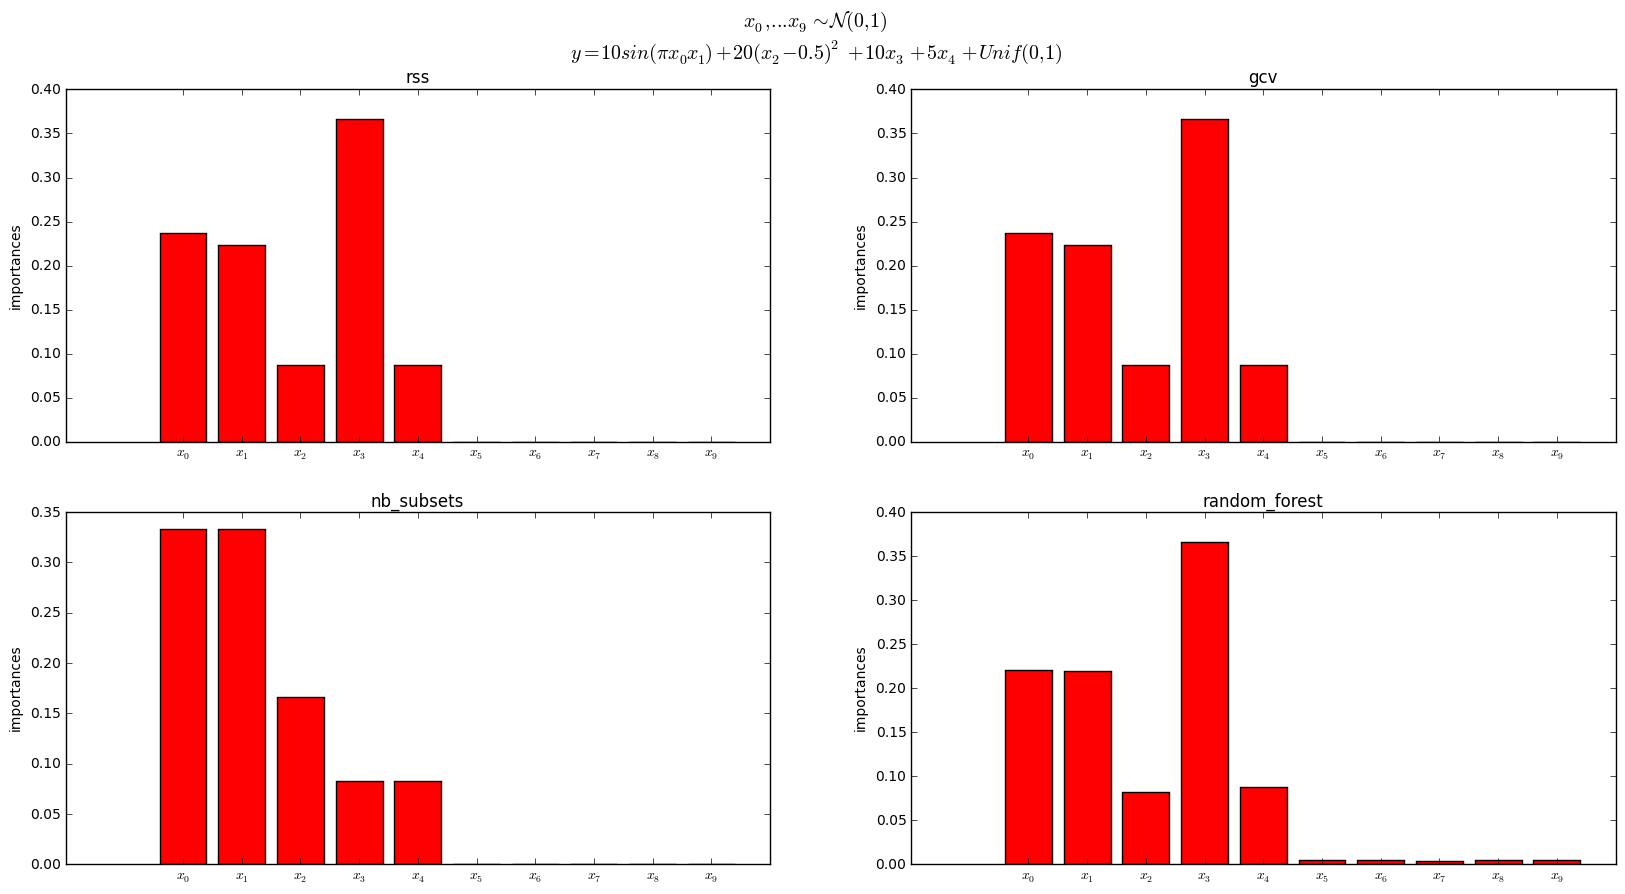

In [6]:
importances = model.feature_importances_
importances['random_forest'] = rf.feature_importances_
criteria = criteria + ('random_forest',)
idx = 1

fig = plt.figure(figsize=(20, 10))
labels = ['$x_{}$'.format(i) for i in range(n)]
for crit in criteria:
    plt.subplot(2, 2, idx)
    plt.bar(numpy.arange(len(labels)),
            importances[crit],
            align='center',
            color='red')
    plt.xticks(numpy.arange(len(labels)), labels)
    plt.title(crit)
    plt.ylabel('importances')
    idx += 1
title = '$x_0,...x_9 \sim \mathcal{N}(0, 1)$\n$y= 10sin(\pi x_{0}x_{1}) + 20(x_2 - 0.5)^2 + 10x_3 + 5x_4 + Unif(0, 1)$'
fig.suptitle(title, fontsize="x-large")